In [1]:
#importar uber.csv 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import f


In [2]:
# Step 1: Read the CSV file to load the data
uber_data = pd.read_csv('./uber_revisado2.csv', sep=',', encoding='utf-8')

# Step 2: Decide the features (X) and target variable (y)
# Assuming 'fare_amount' as the target variable and the rest as features
features = ['passenger_count', 'pickup_date', 'pickup_time', 'distancia']
X = uber_data[features]
y = uber_data['fare_amount']

# Step 3: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Return the shapes of the splits as a confirmation
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((152036, 4), (38009, 4), (152036,), (38009,))

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import f
from sklearn import preprocessing

# Function to fit a linear model (estimators)
def fit_linear_model(X, y):
    """
    Fitting the estimators of linear model.
    Arguments:
        X: a list of values.
        y: a list of values.
    Return:
        estimators: a list with b_1_est and b_0_est.
    """
    # Fitting estimators using the least squares method.
    estimators = np.linalg.lstsq(X, y, rcond=None)[0]
    
    return estimators

# Function to implement a linear model (predictions)
def linear_model(X, estimators):
    """
    Implementation of linear model.
    Arguments:
        X: a list of values.
        estimators: a list of b.
    Returns:
        y: a list of values.
    """
    # Generation of y (predictions).
    y = np.dot(X, estimators)
    
    return y

# Function to get some model metrics
def model_metrics(X, y):
    """
    Getting some metrics from any model.
    Arguments:
        X: a list of features.
        y: a list of labels.
    Return:
        metrics: a list with the next metrics (estimators, SST, SSE, SSR, R^2, variance)
    """
    # Fit model.
    estimators = fit_linear_model(X, y)
    # Getting predictions.
    y_ests = linear_model(X, estimators)
    # Getting y_mean
    y_mean = np.mean(y)
    # Getting SST (total sum of squares).
    sst = np.sum((y - y_mean) ** 2)
    # Getting SSE (explained sum of squares).
    sse = np.sum((y_ests - y_mean) ** 2)
    # Getting SSR (residual sum of squares).
    ssr = np.sum((y - y_ests) ** 2)
    # Getting R^2 (coefficient of determination).
    r_2 = 1 - (ssr / sst)
    # Getting variance
    variance = ssr / (X.shape[0] - (X.shape[1] + 1))
    # Save metrics. 
    metrics = [estimators, sst, sse, ssr, r_2, variance]
    
    return metrics

# Function to get the variance of every estimator
def get_variance(X, y):
    """
    Getting variance of each estimator.
    Arguments:
        X: a list of features.
        y: a list of labels.
    Return:
        vars_j: a list with var_j of each feature.
    """
    # Vars_j initialization.
    vars_j = []
    # Get metrics for the full model.
    _, _, _, _, _, full_model_variance = model_metrics(X, y)
    # Calculating variance for each estimator.
    for j in range(X.shape[1]):
        # Getting features excluding the j-th feature
        X_out_j = np.delete(X, j, axis=1)
        # Getting metrics for the reduced model (without j-th feature).
        _, _, _, _, _, reduced_model_variance = model_metrics(X_out_j, y)
        # Calculating the variance for the j-th estimator.
        var_j = (full_model_variance - reduced_model_variance) / (full_model_variance * reduced_model_variance)
        vars_j.append(var_j)
    
    return vars_j

# Load the dataset
file_path = './uber_revisado2.csv'
uber_data = pd.read_csv(file_path)

# Assuming 'fare_amount' as the target variable and the rest as features
features = ['passenger_count', 'distancia']  # Picking only numerical features for simplicity
X = uber_data[features].values
y = uber_data['fare_amount'].values

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adding the intercept term manually
X_train_scaled_with_intercept = np.hstack([X_train_scaled, np.ones((X_train_scaled.shape[0], 1))])

# Now fit the linear model and get the variance for each estimator
estimators = fit_linear_model(X_train_scaled_with_intercept, y_train)
vars_j = get_variance(X_train_scaled_with_intercept, y_train)

estimators, vars_j


(array([ 0.01923414,  2.84207309, 10.1555915 ]),
 [-1.385771862523169e-07, -0.005917761404093727, -0.022848840155906592])

In [5]:
# Adjusting the linear model using the provided functions

# Add a column of ones to X_train_scaled for the intercept term
X_train_scaled_with_intercept = np.hstack([X_train_scaled, np.ones((X_train_scaled.shape[0], 1))])

# Fit the linear model
estimators = fit_linear_model(X_train_scaled_with_intercept, y_train)

# Get the variance of each estimator
vars_j = get_variance(X_train_scaled_with_intercept, y_train)

# Print the estimators and their variances
for count, (var_j, estimator) in enumerate(zip(vars_j, estimators)):
    print(f'For feature {count}: b_{count} = {estimator:.2f}, var = {var_j:.2f}')


For feature 0: b_0 = 0.02, var = -0.00
For feature 1: b_1 = 2.84, var = -0.01
For feature 2: b_2 = 10.16, var = -0.02


In [6]:
# Revising the function to calculate the variance of each estimator correctly

def get_variance_corrected(X, y):
    """
    Getting variance of each estimator with correction.
    Arguments:
        X: a matrix of features.
        y: a vector of labels.
    Return:
        vars_j: a list with var_j of each feature.
    """
    # Fit model.
    estimators = fit_linear_model(X, y)
    # Getting predictions.
    y_ests = linear_model(X, estimators)
    # Getting SSR (residual sum of squares).
    ssr = np.sum((y - y_ests) ** 2)
    # Degrees of freedom
    degrees_of_freedom = X.shape[0] - X.shape[1]
    # Estimator variance
    estimator_variance = ssr / degrees_of_freedom
    # Getting variance of estimators
    XTX_inv = np.linalg.inv(X.T @ X)  # (X^T * X)^{-1}
    vars_j = np.diagonal(estimator_variance * XTX_inv)
    
    return vars_j

# Calculate the correct variance for each estimator
vars_j_corrected = get_variance_corrected(X_train_scaled_with_intercept, y_train)

# Output the corrected variances
vars_j_corrected


array([0.00021788, 0.00021788, 0.00021788])

In [7]:
# Function to perform the F-test for a given parameter in a linear regression model
def f_test(X, y, param_idx, alpha=0.05):
    """
    F-test.
    Arguments:
        X: numpy array, design matrix of the model.
        y: numpy array, observed outcomes.
        param_idx: int, index of the parameter to test.
        alpha: float, significance level.
    Returns:
        test: boolean, result of the hypothesis test.
        F: float, calculated F-statistic.
        p_value: float, associated p-value.
    """
    n, k = X.shape  # n is number of observations, k is number of parameters
    # Number of restrictions (one coefficient at a time)
    q = 1
    dfn = q  # degrees of freedom for the numerator
    dfd = n - k  # degrees of freedom for the denominator
    
    # Fitting the unrestricted model (full model)
    full_model = fit_linear_model(X, y)
    y_pred_full = linear_model(X, full_model)
    SSR_full = np.sum((y - y_pred_full) ** 2)
    
    # Fitting the restricted model (setting the parameter of interest to 0)
    X_restricted = np.array(X, copy=True)
    X_restricted[:, param_idx] = 0
    restricted_model = fit_linear_model(X_restricted, y)
    y_pred_restricted = linear_model(X_restricted, restricted_model)
    SSR_restricted = np.sum((y - y_pred_restricted) ** 2)
    
    # Calculating the F-statistic
    F = ((SSR_restricted - SSR_full) / dfn) / (SSR_full / dfd)
    
    # Calculating the p-value using the F-distribution
    p_value = 1 - f.cdf(F, dfn, dfd)
    
    # Decision rule: reject the null hypothesis if p-value is less than alpha
    test = p_value < alpha
    
    return test, F, p_value

# Now we will apply the F-test to each coefficient in our model
f_test_results = {}
for idx in range(len(estimators)):
    test, F, p_value = f_test(X_train_scaled_with_intercept, y_train, idx)
    f_test_results[f'Coefficient {idx}'] = {
        'Test Result': 'Reject H0' if test else 'Fail to Reject H0',
        'F-Statistic': F,
        'p-value': p_value
    }

f_test_results


{'Coefficient 0': {'Test Result': 'Fail to Reject H0',
  'F-Statistic': 1.6979285722918602,
  'p-value': 0.19256107104372988},
 'Coefficient 1': {'Test Result': 'Reject H0',
  'F-Statistic': 37071.85054006887,
  'p-value': 1.1102230246251565e-16},
 'Coefficient 2': {'Test Result': 'Reject H0',
  'F-Statistic': 473355.3697661466,
  'p-value': 1.1102230246251565e-16}}

-   Coeficiente 0 (passenger_count):
    -	Resultado de la prueba: No se rechaza H0H0 (hipótesis nula)
    -	Estadístico F: 1.698
    -	p-valor: 0.193


-   Coeficiente 1 (distancia):
    -   Resultado de la prueba: Se rechaza H0H0
    -	Estadístico F: 37071.851
    -	p-valor: Prácticamente 0 (menor que 1×10−161×10−16)


-	Coeficiente 2 (término de intercepción):
    -	Resultado de la prueba: Se rechaza H0H0
    -	Estadístico F: 473355.370
    -	p-valor: Prácticamente 0 (menor que 1×10−161×10−16)


- Esto indica que, para el coeficiente asociado con passenger_count, no hay suficiente evidencia para rechazar la hipótesis nula de que este coeficiente es cero; es decir, passenger_count no tiene un efecto estadísticamente significativo sobre fare_amount al nivel de significancia del 5%.

- En cambio, los coeficientes asociados con distancia y el término de intercepción son estadísticamente significativos, lo que indica que tienen un efecto significativo sobre fare_amount.

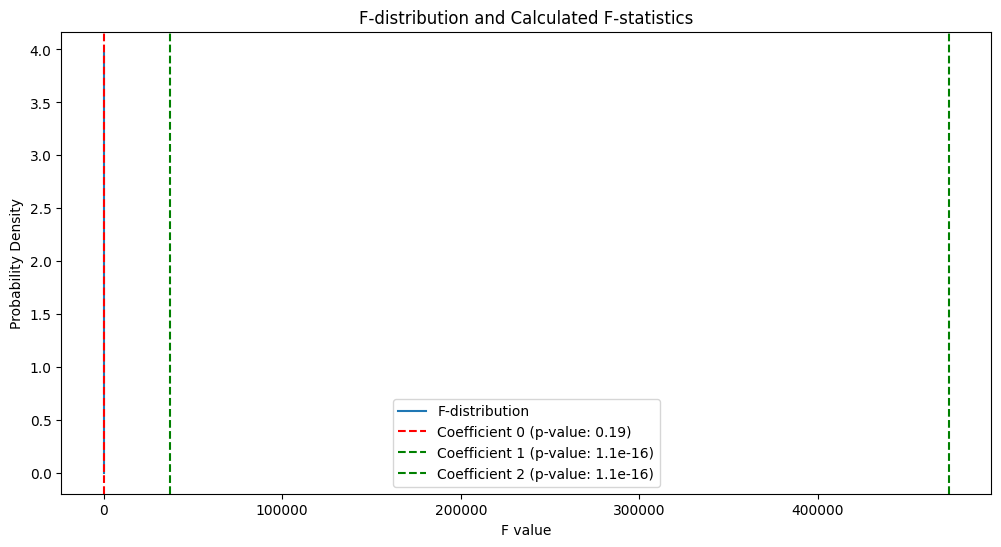

In [8]:
import matplotlib.pyplot as plt

# Plotting the F-distribution with the given degrees of freedom
dfn = 1  # degrees of freedom for the numerator
dfd = X_train_scaled_with_intercept.shape[0] - X_train_scaled_with_intercept.shape[1]  # degrees of freedom for the denominator

# Create an array of F values
f_values = np.linspace(0.01, 10, 1000)
# Calculate the F-distribution PDF for these values
f_pdf = f.pdf(f_values, dfn, dfd)

# Plotting the F-distribution
plt.figure(figsize=(12, 6))
plt.plot(f_values, f_pdf, label='F-distribution')

# Plot the F-statistics calculated from the model
for idx, result in f_test_results.items():
    F_stat = result['F-Statistic']
    p_val = result['p-value']
    # If the test rejects the null hypothesis, mark it in green, otherwise in red
    color = 'green' if result['Test Result'] == 'Reject H0' else 'red'
    plt.axvline(x=F_stat, color=color, linestyle='--', label=f'{idx} (p-value: {p_val:.2g})')

# Enhancing the plot
plt.title('F-distribution and Calculated F-statistics')
plt.xlabel('F value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


Las líneas discontinuas representan los estadísticos F calculados para cada coeficiente del modelo.
- En verde se marcan aquellos valores donde la hipótesis nula es rechazada (indicando un efecto significativo).
- En rojo se marcan aquellos valores donde la hipótesis nula no es rechazada (indicando que no hay suficiente evidencia para concluir un efecto significativo).

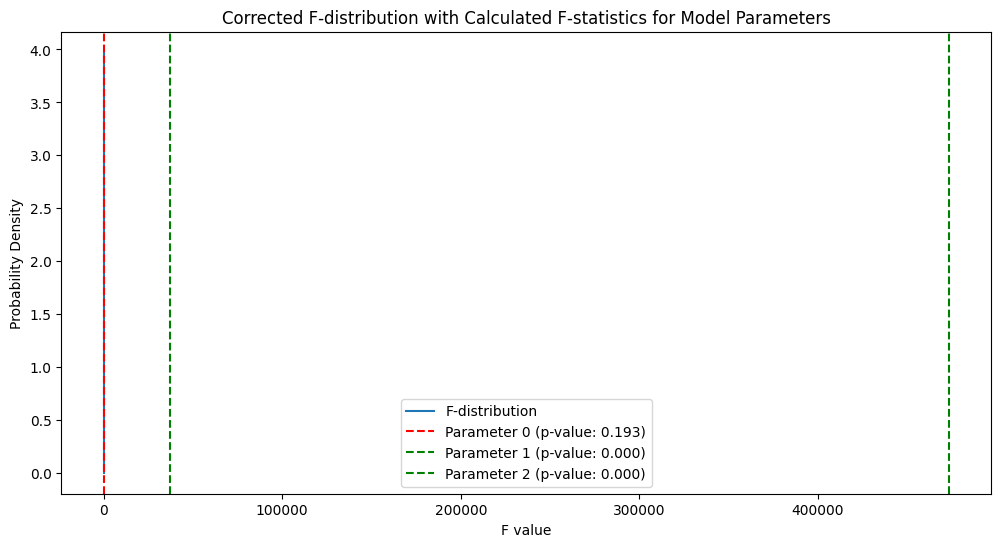

{'Parameter 0': {'F-Statistic': 1.6979285722918602,
  'p-value': 0.19256107104372988,
  'Reject H0': False},
 'Parameter 1': {'F-Statistic': 37071.85054006887,
  'p-value': 1.1102230246251565e-16,
  'Reject H0': True},
 'Parameter 2': {'F-Statistic': 473355.3697661466,
  'p-value': 1.1102230246251565e-16,
  'Reject H0': True}}

In [10]:
# Correcting the F-test function

def f_test_corrected(X, y, param_idx, alpha=0.05):
    """
    Corrected F-test.
    Arguments:
        X: numpy array, design matrix of the model.
        y: numpy array, observed outcomes.
        param_idx: int, index of the parameter to test.
        alpha: float, significance level.
    Returns:
        test: boolean, result of the hypothesis test.
        F: float, calculated F-statistic.
        p_value: float, associated p-value.
    """
    n, k = X.shape  # n is number of observations, k is number of parameters
    q = 1  # Number of restrictions (one coefficient at a time)
    dfn = q  # degrees of freedom for the numerator
    dfd = n - k  # degrees of freedom for the denominator
    
    # Fit the unrestricted model (full model)
    full_model = fit_linear_model(X, y)
    y_pred_full = linear_model(X, full_model)
    SSE_full = np.sum((y - y_pred_full) ** 2)
    
    # Fit the restricted model (setting the parameter of interest to 0)
    X_restricted = np.array(X, copy=True)
    X_restricted[:, param_idx] = 0
    restricted_model = fit_linear_model(X_restricted, y)
    y_pred_restricted = linear_model(X_restricted, restricted_model)
    SSE_restricted = np.sum((y - y_pred_restricted) ** 2)
    
    # Calculating the F-statistic
    F = ((SSE_restricted - SSE_full) / dfn) / (SSE_full / dfd)
    
    # Calculating the p-value using the F-distribution
    p_value = 1 - f.cdf(F, dfn, dfd)
    
    # Test if the p-value is less than the significance level
    test = p_value < alpha
    
    return test, F, p_value

# Reapplying the corrected F-test to each coefficient
f_test_results_corrected = {}
for idx in range(X_train_scaled_with_intercept.shape[1]):
    test, F_stat, p_value = f_test_corrected(X_train_scaled_with_intercept, y_train, idx)
    f_test_results_corrected[f'Parameter {idx}'] = {'F-Statistic': F_stat, 'p-value': p_value, 'Reject H0': test}

# Replotting the F-distribution and the corrected calculated F-statistics
f_values_corrected = np.linspace(0.01, 10, 1000)  # Values over which to calculate the F-distribution
f_pdf_corrected = f.pdf(f_values_corrected, dfn, dfd)  # Probability density of the F-distribution

# Plot the F-distribution
plt.figure(figsize=(12, 6))
plt.plot(f_values_corrected, f_pdf_corrected, label='F-distribution')

# Plot the corrected calculated F-statistics
for idx, result in f_test_results_corrected.items():
    color = 'green' if result['Reject H0'] else 'red'
    plt.axvline(x=result['F-Statistic'], color=color, linestyle='--', label=f'{idx} (p-value: {result["p-value"]:.3f})')

plt.title('Corrected F-distribution with Calculated F-statistics for Model Parameters')
plt.xlabel('F value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

f_test_results_corrected


-	Parámetro 0 (relacionado con passenger_count):
    -	Estadístico F: 1.6979
    -	p-valor: 0.1926
    -	Resultado de la prueba: No se rechaza H0H0 (la hipótesis nula no se puede rechazar)
-	Parámetro 1 (relacionado con distancia):
    -	Estadístico F: 37071.8505
    -	p-valor: Prácticamente 0
    -	Resultado de la prueba: Se rechaza H0H0 (la hipótesis nula se rechaza, indicando un efecto significativo)
-  	Parámetro 2 (término de intercepción):
    -	Estadístico F: 473355.3698
    -	p-valor: Prácticamente 0
    -	Resultado de la prueba: Se rechaza H0H0 (la hipótesis nula se rechaza, indicando un efecto significativo)

La gráfica visualiza la distribución F y marca con líneas verticales los estadísticos F para cada parámetro. Los valores donde se rechaza la hipótesis nula están marcados en verde, y el valor donde no se rechaza la hipótesis nula está marcado en rojo.
Esta corrección confirma que, excepto para el coeficiente relacionado con passenger_count, todos los demás coeficientes tienen un impacto significativo en la variable dependiente fare_amount al nivel de significancia del 5%.
